In [1]:
import wrangle
import acquire
import unicodedata
import re

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import env

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import pandas as pd
from time import strftime


import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
from sklearn.model_selection import train_test_split
import os

import warnings
warnings.filterwarnings("ignore")

## Wrangle

In [2]:
train, validate, test = wrangle.wrangle_readmes()

Getting both Python and Java-script data via scraping


In [4]:
train.head()

,repo_name,url,language,readme_content,cleaned_content,lemmatized
30,python/cpython,https://github.com/python/cpython/blob/main/RE...,Python,This is Python version 3.13.0 alpha 0Copyright...,this is python version 3130 alpha 0copyright ...,python version 3130 alpha 0copyright 20012023 ...
77,microsoft/TailwindTraders-Website,https://github.com/microsoft/TailwindTraders-W...,JavaScript,Tailwind Traders WebsiteRepositoriesFor this d...,tailwind traders websiterepositoriesfor this d...,tailwind trader websiterepositoriesfor demo re...
37,meteor/meteor,https://github.com/meteor/meteor/blob/devel/RE...,JavaScript,Meteor is an ultra-simple environment ...,meteor is an ultrasimple environment f...,meteor ultrasimple environment building modern...
37,yunjey/pytorch-tutorial,https://github.com/yunjey/pytorch-tutorial/blo...,Python,This repository provides tutorial code for dee...,this repository provides tutorial code for dee...,repository provides tutorial code deep learnin...
80,DefiLlama/DefiLlama-Adapters,https://github.com/DefiLlama/DefiLlama-Adapter...,JavaScript,Defillama AdaptersFollow this guide to create ...,defillama adaptersfollow this guide to create ...,defillama adaptersfollow guide create adapter ...


In [23]:
train.shape

(122, 6)

In [24]:
validate.shape

(26, 7)

In [25]:
test.shape

(27, 7)

In [26]:
train.language.value_counts()

JavaScript    61
Python        60
Name: language, dtype: int64

## Prepare

In [27]:
train_df = train.drop(columns=['repo_name', 'url', 'readme_content', 'cleaned_content'])

In [28]:
train_df.head()

,language,lemmatized
38,Python,google automation python professional certific...
59,Python,stable diffusion web uia browser interface bas...
54,Python,pytorch yoloa minimal pytorch implementation y...
23,Python,manim engine precise programmatic animation de...
84,JavaScript,uniapp englishuniapp vuejs h5apphttpsuniappdcl...


In [29]:
python_df = train_df[train_df.language == 'Python']
javascript_df = train_df[train_df.language == 'JavaScript']

In [41]:
python_words = pd.Series(" ".join(python_df.lemmatized).split())
javascript_words = pd.Series(" ".join(javascript_df.lemmatized).split())

In [45]:
pywords_df = pd.DataFrame(python_words, columns=['python_words'])
jswords_df = pd.DataFrame(javascript_words, columns=['javascript_words'])

In [54]:
pywords_df

,python_words
0,google
1,automation
2,python
3,professional
4,certificate
...,...
53148,like
53149,library
53150,old
53151,note


## Explore py trigrams

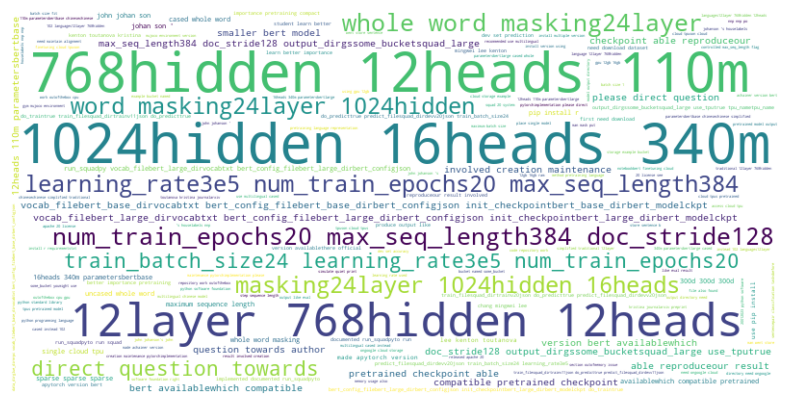

In [82]:
def generate_trigrams(words):
    trigrams = []

    if len(words) < 3:
        return trigrams

    for i in range(len(words) - 2):
        trigram = " ".join(words[i:i+3])
        trigrams.append(trigram)

    return trigrams

# Make a list of Python words
pylist = pywords_df.python_words.tolist()

# Generate Python trigrams
py_tgrams = generate_trigrams(pylist)

py_tri_df = pd.DataFrame(py_tgrams, columns=['trigrams'])

# View py trigrams value counts
pytri_freq = py_tri_df.trigrams.value_counts()

# Convert the value counts Series to a dictionary
pytri_freq_dict = pytri_freq.to_dict()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(pytri_freq_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


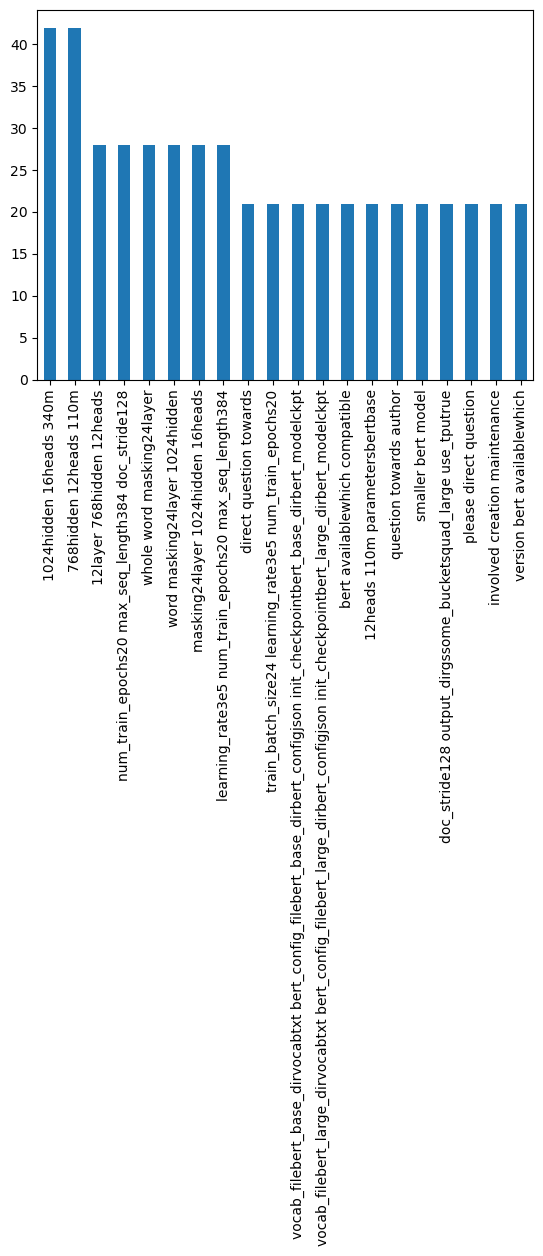

In [94]:
pytri_freq.head(20).plot.bar()
plt.xticks(rotation=90);

## Explore js trigrams

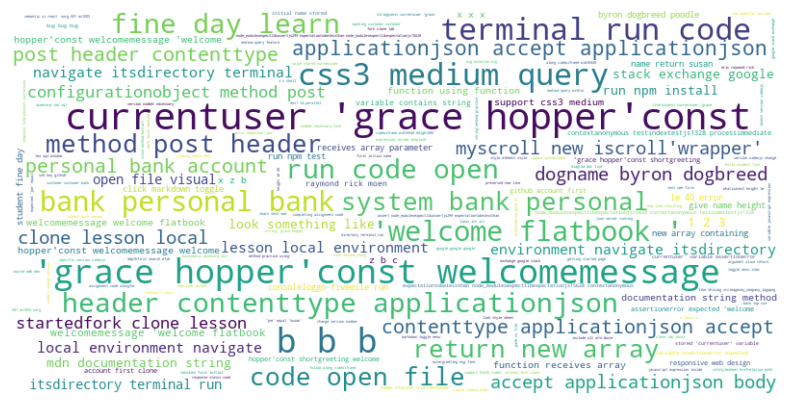

In [84]:
# Make a list of Python words
jslist = jswords_df.javascript_words.tolist()

# Generate Python trigrams
js_tgrams = generate_trigrams(jslist)

js_tri_df = pd.DataFrame(js_tgrams, columns=['trigrams'])

# View py trigrams value counts
jstri_freq = js_tri_df.trigrams.value_counts()

# Convert the value counts Series to a dictionary
jstri_freq_dict = jstri_freq.to_dict()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(jstri_freq_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [87]:
jstri_freq

currentuser 'grace hopper'const              18
b b b                                        14
'grace hopper'const welcomemessage           14
terminal run code                            12
css3 medium query                            12
                                             ..
directory reacthooksnpmlab thepackagejson     1
name directory reacthooksnpmlab               1
itis name directory                           1
see itis name                                 1
imadappimad course application                1
Name: trigrams, Length: 23587, dtype: int64

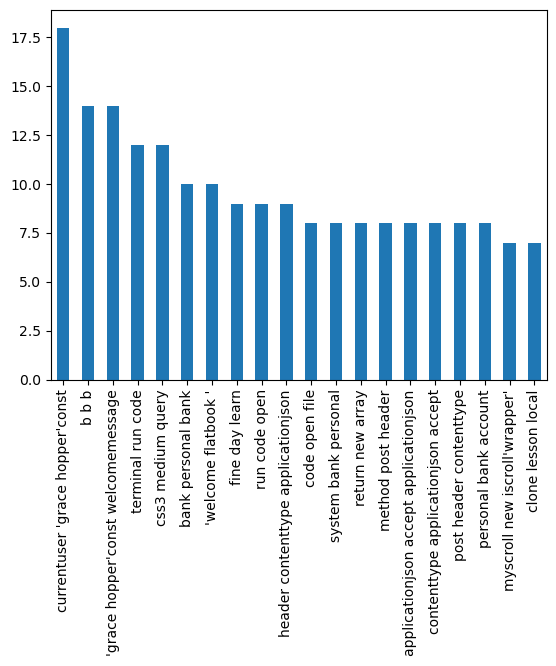

In [95]:
jstri_freq.head(20).plot.bar()
plt.xticks(rotation=90);

# Separate into python

In [ ]:
def generate_trigrams(text):
    words = text
    trigrams = []

    if len(words) < 3:
        return trigrams

    for i in range(len(words) - 2):
        trigram = " ".join(words[i:i+3])
        trigrams.append(trigram)

    return trigrams

def generate_bigrams(text):
    words = text
    bigrams = []

    if len(words) < 2:
        return bigrams

    for i in range(len(words) - 1):
        bigram = " ".join(words[i:i+2])
        bigrams.append(bigram)

    return bigrams

## A simple way to calculate idf for demonstration. Note that this   

In [ ]:
# function relies on the globally defined documents variable.
def idf(word):            
    n_occurences = sum([1 for doc in documents.values() if word in doc])
    return len(documents) / n_occurences + 1

# Get a list of the unique words
unique_words = pd.Series(' '.join(documents.values()).split()).unique()

# put the unique words into a data frame
(pd.DataFrame(dict(word=unique_words))
 # calculate the idf for each word
 .assign(idf=lambda df: df.word.apply(idf))
 # sort the data for presentation purposes
 .set_index('word')
 .sort_values(by='idf', ascending=False)
 .head(5))

# Show counts and ratios